## New York City Emissions Intensity Map

##### Notebook by [Mohamad Razkenari](https://www.razkenari.com)

<img src="https://www.urbangreencouncil.org/sites/default/files/landing_page_image.jpg"/>

## Introduction


To reduce carbon emissions from buildings, the City of New York enacted [Local Law 97 (LL97)](https://www1.nyc.gov/site/sustainablebuildings/ll97/local-law-97.page) in 2019 as a part of the Climate Mobilization Act. This law places carbon caps on most buildings larger than 25,000 square feet—roughly 50,000 residential and commercial properties across NYC. These caps start in 2024 and will become more stringent over time, eventually reducing emissions 80 percent by 2050. This project uses building energy consumption and building characteristics data to calculate the emissions intensity, and compare it with the emissions limit according to building end use classification. Then, maximum penalty for non-compliance is calculated.

>**Project Objective**: Calculate Emissions Intensity for buildings in New York City, and assess their compliance with Local Law 97.

<!-- Here’s what you need to know

* Applies to all buildings in NYC greater than 25000 square feet; applicable for approximately 60% residential and 40% commercial buildings
* Penalties for non-compliance; maximum penalty is calculated based on the difference between a building’s annual emissions limit and its actual emissions multiplied by 268
* A building’s annual emissions limit equals its emissions intensity limit multiplied by its gross floor area
* Many buildings are significantly above emissions limits and will require comprehensive retrofits or potentially face millions of dollars in penalties
* There are two increasingly stringent phases of limits; first phase takes effect in 2024 and the second occurring in 2030
* Emissions intensity limits (metric tons of CO2e per square foot) are set based on 10 building categories defined by Building Code occupancy groups
* Renewable energy credits and/or emissions offsets can be used to comply with the caps -->

## Required libraries
This notebook uses several Python packages that come standard with the Anaconda Python distribution. The primary libraries that we'll be using are:

* **NumPy**: Provides a fast numerical array structure and helper functions.
* **Pandas**: Provides a DataFrame structure to store data in memory and work with it easily and efficiently.
* **Scikit-learn**: The essential Machine Learning package in Python.
* **Matplotlib**: Basic plotting library in Python; most other Python plotting libraries are built on top of it.
* **Seaborn**: Advanced statistical plotting library.
* **GeoPandas**: GeoPandas is an open source project to make working with geospatial data in python easier.
* **ArcGIS**: Advanced library to convert and manage geographic data, automate spatial workflows, perform advanced spatial analytics.
* **Sodapy**: API for getting NYC data.
* **folium**: A library to create several types of Leaflet maps

## Required Datasets

**To calculate Emissions Intensity:** Emissions intensity is the total global warming potential per square foot per year, measured in kg CO2e/m2/a
* [Energy use benchmarking data](https://data.cityofnewyork.us/Environment/Energy-and-Water-Data-Disclosure-for-Local-Law-84-/usc3-8zwd) (anual energy consumption, including natural gas, electricity, and district steam - NYC Open Data, LL84)    
* [Building footprint data](https://data.cityofnewyork.us/Housing-Development/Building-Footprints/nqwf-w8eh) (available in NYC Open Data)
* [Building 3D models](https://www1.nyc.gov/site/doitt/initiatives/3d-building.page) (available in NYC Open Data)

**To identify Emissions Target:** Emissions limit are specifed in the LL97 based on the building classification for 2024 and 2030. 
* [Building Use and Characteristics](https://www1.nyc.gov/site/planning/data-maps/open-data/bytes-archive.page?sorts[year]=0) (available in NYC Open Data)

--
<!-- ** Featureset Exploration **

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands. 



§ 28-320.3.1 Annual building emissions limits 2024-2029. For calendar years 2024 through
2029 the annual building emissions limits for covered buildings shall be calculated pursuant to
items 1 through 10 of this section. For the purposes of such calculation the department shall
provide a method for converting categories of uses under the United States environmental
protection agency Portfolio Manager tool to the equivalent uses and occupancy groups set forth in
this section. For a covered building with spaces classified in more than one occupancy group, the
annual building emissions limit shall be the sum of the calculated values from items 1 through 10
of this paragraph, as applicable for each space.
1. For spaces classified as occupancy group A: multiply the building emissions intensity limit
of 0.01074 tCO2e/sf by the corresponding gross floor area (sf);
2. For spaces classified as occupancy group B other than as described in item 6: multiply the
building emissions intensity limit of 0.00846 tCO2e/sf by the corresponding gross floor
area (sf);
3. For spaces classified as occupancy groups E and I-4: multiply the building emissions
intensity limit of 0.00758 tCO2e/sf by the corresponding gross floor area (sf);
4. For spaces classified as occupancy group I-1: multiply the building emissions intensity
limit of 0.01138 tCO2e/sf by the corresponding gross floor area (sf);
10
5. For spaces classified as occupancy group F: multiply the building emissions intensity
limit of 0.00574 tCO2e/sf by the corresponding gross floor area (sf);
6. For spaces classified as occupancy groups B civic administrative facility for emergency
response services, B non-production laboratory, Group B ambulatory health care
facility, H, I-2 and I-3: multiply the building emissions intensity limit of 0.02381 tCO2e/sf
by the corresponding gross floor area (sf);
7. For spaces classified as occupancy group M: multiply the building emissions intensity
limit of 0.01181 tCO2e/sf by the corresponding gross floor area (sf);
8. For spaces classified as occupancy group R-1: multiply the building emissions intensity
limit of 0.00987 tCO2e/sf by the corresponding gross floor area (sf);
9. For spaces classified as occupancy group R-2: multiply the building emissions intensity
limit of 0.00675 tCO2e/sf by the corresponding gross floor area (sf);
10. For spaces classified as occupancy groups S and U: multiply the building emissions
intensity limit of 0.00426 tCO2e/sf by the corresponding gross floor area (sf).
§ 28-320.3.1.1 Greenhouse gas coefficient of energy consumption for calendar years 2024
through 2029. The annual building emissions of a covered building in accordance with this
section, greenhouse gas emissions shall be calculated as follows for calendar years 2024 through
2029:
1. Utility electricity consumed on the premises of a covered building that is delivered to the
building via the electric grid shall be calculated as generating 0.000288962 tCO2e per
kilowatt hour, provided, however, that the department, in consultation with the office of
long term planning and sustainability, shall promulgate rules governing the calculation of
greenhouse gas emissions for campus-style electric systems that share on-site generation
but make use of the utility distribution system and for buildings that are not connected to
the utility distribution system.
2. Natural gas combusted on the premises of a covered building shall be calculated as
generating 0.00005311 tCO2e per kbtu.
3. #2 fuel oil combusted on the premises of a covered building shall be calculated as
generating 0.00007421 tCO2e per kbtu.
4. #4 fuel oil combusted on the premises of a covered building shall be calculated as
generating 0.00007529 tCO2e per kbtu.
5. District steam consumed on the premises of a covered building shall be calculated as
generating 0.00004493tCO2e per kbtu.
11
6. The amount of greenhouse gas emissions attributable to other energy sources, including
but not limited to distributed energy resources, shall be determined by the commissioner
and promulgated into rules of the department.
§ 28-320.3.2 Building emissions limits for calendar years 2030 through 2034. For calendar
years 2030 through 2034 the annual building emissions limits for covered buildings shall be
calculated pursuant to items 1 through 10 of this section. For the purposes of such calculation the
department shall provide a method for converting categories of uses under the United States
environmental protection agency Portfolio Manager tool to the equivalent uses and occupancy
groups set forth in this section. For a covered building with spaces classified in more than one
occupancy group, the annual building emissions limit shall be the sum of the calculated values
from items 1 through 10 of this paragraph, as applicable for each space. The department may
establish different limits, set forth in the rules of the department, where the department determines
that different limits are feasible and in the public interest. Where such limits are set by rule, the
average emission limits for all covered buildings shall not be less restrictive than the average
emissions impact of the building emissions limits outlined in items 1 through 10 of this section. The
advisory board and the office of long term planning and sustainability shall provide advice and
recommendation regarding such limits.
1. For spaces classified as occupancy group A: multiply the building emissions intensity limit
of 0.00420 tCO2e/sf by the corresponding gross floor area (sf);
2. For spaces classified as occupancy group B other than as described in item 6: multiply the
building emissions intensity limit of 0.00453 tCO2e/sf by the corresponding gross floor
area (sf);
3. For spaces classified as occupancy groups E and I-4: multiply the building emissions
intensity limit of 0.00344 tCO2e/sf by the corresponding gross floor area (sf);
4. For spaces classified as occupancy group I-1: multiply the building emissions intensity
limit of 0.00598 tCO2e/sf by the corresponding gross floor area (sf);
5. For spaces classified as occupancy group F: multiply the building emissions intensity limit
of 0.00167 tCO2e/sf by the corresponding gross floor area (sf);
6. For spaces classified as occupancy groups B civic administrative facility for emergency
response services, B non-production laboratory, Group B ambulatory health care
facility, H, I-2 or I-3: multiply the building emissions intensity limit of 0.01193 tCO2e/sf
by the corresponding gross floor area (sf);
7. For spaces classified as occupancy group M: multiply the building emissions intensity
limit of 0.00403 tCO2e/sf by the corresponding gross floor area (sf);
12
8. For spaces classified as occupancy group R-1: multiply the building emissions intensity
limit of 0.00526 tCO2e/sf by the corresponding gross floor area (sf);
9. For spaces classified as occupancy groups R-2: multiply the building emissions intensity
limit of 0.00407 tCO2e/sf by the corresponding gross floor area (sf);
10. For spaces classified as occupancy groups S and U: multiply the building emissions
intensity limit of 0.00110 tCO2e/sf by the corresponding gross floor area (sf).
§ 28-320.3.2.1 Greenhouse gas coefficients of energy consumption for calendar years 2030
through 2034. For the purposes of calculating the annual building emissions of a covered
building in accordance with this section, the amount of greenhouse gas emissions attributed to
particular energy sources shall be determined by the commissioner and promulgated into rules of
the department by no later than January 1, 2023. The commissioner shall consult with the advisory
board required by this article to develop such greenhouse gas coefficients for utility electricity
consumption. When developing such coefficient, the commissioner shall consider factors
including, but not limited to, the best available New York state energy research and development
authority and State Energy Plan forecasts for Zone J for the end of the compliance period and
beneficial electrification.
§ 28-320.3.4 Building emissions limits for calendar years 2035 through 2050. No later than
January 1, 2023, the commissioner shall establish by rule annual building emissions limits and
building emissions intensity limits applicable for calendar years 2035 through 2039 and building
emissions limits and building emissions intensity limits applicable for calendar years 2040
through 2049. Such limits shall be set to achieve an average building emissions intensity for all
covered buildings of no more than 0.0014 tCO2e/sf/yr by 2050.

-->

### Import Packages

In [1]:
# Install and Import packages in the current Jupyter kernel

import sys
import os

# !{sys.executable} -m pip install numpy pandas scikit-learn matplotlib seaborn arcgis sodapy folium pyspark
# !conda install --yes --prefix {sys.prefix} geopandas

import pandas as pd
import numpy as np
from sodapy import Socrata

from arcgis import GIS
from arcgis.geocoding import geocode
from arcgis.geometry import lengths, areas_and_lengths, project
from arcgis.geometry import Point, Polyline, Polygon, Geometry
import geopandas
import folium
import pickle

### Import and Prepare Data

In [4]:
# Data ID from NYC OPEN DATA
dic_id = {
    'consumption_2020' : 'usc3-8zwd' ,  #building consumption 2020
    'consumption_2019' : 'wcm8-aq5w' , #building consumption 2019
    'consumption_2018' : '4tys-3tzj' , #building consumption 2018
    'consumption_2017' : '4tys-3tzj' , #building consumption 2017
    'consumption_2016' : 'utpj-74fz' , #building consumption 2016
    'consumption_2015' : '77q4-nkfh' , #building consumption 2015
    'consumption_2014' : 'nbun-wekj' , #building consumption 2014
    'consumption_2013' : 'yr5p-wjer' , #building consumption 2013
    'consumption_2012' : 'r6ub-zhff' , #building consumption 2012
    'consumption_2011' : 'k7nh-aufb' , #building consumption 2011
    'consumption_2010' : 'kswi-37bp' , #building consumption 2010
    'footprint' : 'qb5r-6dgf' , #building foorprint coordinates
    'points' : '7w4b-tj9d' , #building coordinates
    'pluto' : '64uk-42ks' , #Primary Land Use Tax Lot Output
    'pluto_change' : 'qt5r-nqxp' , #PLUTO changes
    }

In [96]:
socrata_domain = 'data.cityofnewyork.us'
socrata_token = os.environ.get("x52Wi0DHBQrk0WqZu2yTkQsnc")
client = Socrata(socrata_domain, socrata_token)

In [258]:
"""
# RUN ONLY ONCE TO STORE THE DATA LOCALLY

def store_data(df_name, api_id):
    json_data = client.get_all(api_id) # to get all data
    df = pd.DataFrame.from_dict(json_data)
    df.to_csv(df_name+'.csv')
    print(df_name+' was stored.')
    return

for key, value in dic_id.items():
    store_data(key, value)

"""

In [5]:
# RUN TO LOAD DATA

for key, value in dic_id.items():
    exec(f"df_{key}" + f" = pd.read_csv('{key}" + ".csv', index_col=[0], low_memory=False)")
    print('df_'+key+' was loaded.')

df_consumption_2020 was loaded.
df_consumption_2019 was loaded.
df_consumption_2018 was loaded.
df_consumption_2017 was loaded.
df_consumption_2016 was loaded.
df_consumption_2015 was loaded.
df_consumption_2014 was loaded.
df_consumption_2013 was loaded.
df_consumption_2012 was loaded.
df_consumption_2011 was loaded.
df_consumption_2010 was loaded.


C:\Users\marazken\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


df_footprint was loaded.
df_points was loaded.
df_pluto was loaded.
df_pluto_change was loaded.


In [6]:
pd.set_option("display.max_columns", None)

In [7]:
df_consumption_2020.head()

,property_id,property_name,parent_property_id,parent_property_name,year_ending,nyc_borough_block_and_lot_bbl,nyc_building_identification_number_bin,address_1,city,postcode,primary_property_type_self_selected,primary_property_type_portfolio_manager_calculated,national_median_reference_property_type,list_of_all_property_use_types_at_property,largest_property_use_type,largest_property_use_type_gross_floor_area_ft,_2nd_largest_property_use_type,_2nd_largest_property_use_gross_floor_area_ft,_3rd_largest_property_use_type,_3rd_largest_property_use_type_gross_floor_area_ft,year_built,construction_status,number_of_buildings,occupancy,metered_areas_energy,metered_areas_water,energy_star_score,national_median_energy_star_score,target_energy_star_score,reason_s_for_no_score,energy_star_certification_year_s_certified_score,energy_star_certification_eligibility,energy_star_certification_last_approval_date,site_eui_kbtu_ft,weather_normalized_site_eui_kbtu_ft,national_median_site_eui_kbtu_ft,site_energy_use_kbtu,weather_normalized_site_energy_use_kbtu,weather_normalized_site_electricity_intensity_kwh_ft,weather_normalized_site_natural_gas_intensity_therms_ft,source_eui_kbtu_ft,weather_normalized_source_eui_kbtu_ft,national_median_source_eui_kbtu_ft,source_energy_use_kbtu,weather_normalized_source_energy_use_kbtu,fuel_oil_1_use_kbtu,fuel_oil_2_use_kbtu,fuel_oil_4_use_kbtu,fuel_oil_5_6_use_kbtu,diesel_2_use_kbtu,propane_use_kbtu,district_steam_use_kbtu,district_hot_water_use_kbtu,district_chilled_water_use_kbtu,natural_gas_use_kbtu,natural_gas_use_therms,weather_normalized_site_natural_gas_use_therms,electricity_use_grid_purchase_kbtu,electricity_use_grid_purchase_kwh,weather_normalized_site_electricity_kwh,electricity_use_grid_purchase_and_generated_from_onsite_renewable_systems_kwh,electricity_use_grid_purchase_and_generated_from_onsite_renewable_systems_kbtu,electricity_use_generated_from_onsite_renewable_systems_and_used_onsite_kwh,electricity_use_generated_from_onsite_renewable_systems_and_used_onsite_kbtu,electricity_use_generated_from_onsite_renewable_systems_kwh,electricity_use_generated_from_onsite_renewable_systems_and_exported_kwh,annual_maximum_demand_kw,annual_maximum_demand_mm_yyyy,annual_maximum_demand_meter_name_meter_id,green_power_onsite_kwh,green_power_offsite_kwh,green_power_onsite_and_offsite_kwh,total_ghg_emissions_metric_tons_co2e,direct_ghg_emissions_metric_tons_co2e,total_ghg_emissions_intensity_kgco2e_ft,direct_ghg_emissions_intensity_kgco2e_ft,indirect_ghg_emissions_metric_tons_co2e,net_emissions_metric_tons_co2e,indirect_ghg_emissions_intensity_kgco2e_ft,national_median_total_ghg_emissions_metric_tons_co2e,egrid_output_emissions_rate_kgco2e_mbtu,avoided_emissions_onsite_green_power_metric_tons_co2e,avoided_emissions_offsite_green_power_metric_tons_co2e,avoided_emissions_onsite_and_offsite_green_power_metric_tons_co2e,percent_of_electricity_that_is_green_power,percent_of_recs_retained,percent_of_total_electricity_generated_from_onsite_renewable_systems,leed_us_project_id,adult_education_gross_floor_area_ft,ambulatory_surgical_center_gross_floor_area_ft,automobile_dealership_gross_floor_area_ft,bank_branch_gross_floor_area_ft,barracks_gross_floor_area_ft,college_university_gross_floor_area_ft,convention_center_gross_floor_area_ft,courthouse_gross_floor_area_ft,data_center_gross_floor_area_ft,data_center_ups_system_redundancy,data_center_cooling_equipment_redundancy,data_center_it_energy_configuration,data_center_energy_estimates_applied,data_center_ups_output_meter_kwh,data_center_pdu_input_meter_kwh,data_center_pdu_output_meter_kwh,data_center_it_equipment_input_meter_kwh,data_center_it_site_energy_kwh,data_center_it_source_energy_kbtu,data_center_pue,data_center_national_median_pue,distribution_center_gross_floor_area_ft,enclosed_mall_gross_floor_area_ft,energy_power_station_gross_floor_area_ft,financial_office_gross_floor_area_ft,financial_office_number_of_computers,financial_office_weekly_operating_hours,financial

In [6]:
df_pluto.head()

,borough,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,firecomp,policeprct,healtharea,sanitboro,sanitsub,address,zonedist1,splitzone,bldgclass,landuse,easements,ownername,lotarea,bldgarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,otherarea,areasource,numbldgs,numfloors,unitsres,unitstotal,lotfront,lotdepth,bldgfront,bldgdepth,proxcode,irrlotcode,lottype,bsmtcode,assessland,assesstot,exempttot,yearbuilt,yearalter1,yearalter2,builtfar,residfar,commfar,facilfar,borocode,bbl,condono,tract2010,xcoord,ycoord,latitude,longitude,zonemap,sanborn,taxmap,appbbl,appdate,plutomapid,version,sanitdistrict,healthcenterdistrict,spdist1,ext,overlay1,ownertype,firm07_flag,pfirm15_flag,edesignum,zonedist2,zmcode,histdist,dcpedited,ltdheight,landmark,overlay2,spdist2,zonedist3,zonedist4
0,MN,563,7502,102.0,61.0,2000.0,2.0,2.0,10003.0,L003,6.0,5700.0,1.0,3A,42 EAST 12 STREET,C6-1,False,R1,2.0,0.0,UNAVAILABLE OWNER,2643.0,10080.0,0.0,10080.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,7.0,6.0,6.0,26.50,103.00,0.00,0.0,0.0,False,5.0,5.0,292501.0,6494851.0,5800.0,1900.0,0.0,0.0,3.81,3.44,6.0,6.5,1,1.005638e+09,453.0,61.0,986475.0,206447.0,40.733326,-73.991972,12c,103 025,10207.0,1.005631e+09,1988-08-25T00:00:00.000,1,21v4,2.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BK,7133,65,315.0,392.0,1003.0,21.0,47.0,11223.0,E254,61.0,8610.0,3.0,5C,2105 OCEAN PARKWAY,R5,False,A9,1.0,0.0,OCEAN PARKWAY BH 26 LLC,3445.0,5306.0,0.0,5306.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,3.0,1.0,1.0,26.50,130.00,17.00,97.0,1.0,False,5.0,2.0,18000.0,178800.0,0.0,2006.0,0.0,0.0,1.54,1.25,0.0,2.0,3,3.071330e+09,NaN,392.0,994016.0,157028.0,40.597676,-73.964833,28c,314 040,32106.0,NaN,NaN,1,21v4,15.0,37.0,OP,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BK,7153,53,315.0,388.0,2002.0,21.0,47.0,11223.0,E254,61.0,8610.0,3.0,5C,2287 EAST 1 STREET,R4,False,B3,1.0,0.0,2287E1 LLC,1500.0,1556.0,0.0,1556.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,2.0,2.0,25.00,60.00,20.67,38.0,2.0,False,5.0,1.0,6360.0,59580.0,0.0,1930.0,0.0,0.0,1.04,0.75,0.0,2.0,3,3.071530e+09,NaN,388.0,992704.0,155373.0,40.593135,-73.969560,28c,314 047,32107.0,NaN,NaN,1,21v4,15.0,37.0,OP,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,QN,6865,402,408.0,450.0,1002.0,28.0,24.0,11432.0,E315,107.0,2810.0,4.0,2D,161-26 GRAND CENTRAL PKWY,R4B,False,A5,1.0,0.0,CARLOS RODRIGUEZ,2925.0,1360.0,0.0,1360.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,1.0,1.0,20.08,145.67,20.00,34.0,3.0,False,5.0,2.0,15960.0,39060.0,1440.0,1935.0,0.0,0.0,0.46,0.90,0.0,2.0,4,4.068650e+09,NaN,450.0,1038622.0,200086.0,40.715699,-73.803864,14c,406 042,43103.0,NaN,NaN,1,21v4,8.0,44.0,NaN,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,QN,8658,14,413.0,1617.0,1013.0,26.0,23.0,11426.0,L162,105.0,2160.0,4.0,2C,244-14 91 AVENUE,R2A,False,A9,1.0,0.0,BASHIR IRFAN,6086.0,2256.0,0.0,2256.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,1.0,1.0,41.00,93.00,22.00,50.0,1.0,True,3.0,2.0,26280.0,44220.0,1440.0,1935.0,2008.0,0.0,0.37,0.50,0.0,1.0,4,4.086580e+09,NaN,1617.0,1060875.0,203891.0,40.725978,-73.723547,15c,422 037,43802.0,NaN,NaN,1,21v4,13.0,43.0,NaN,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
len(df_pluto.bbl.unique())

859032

In [16]:
len(df_consumption_2020)

28067

In [9]:
len(df_consumption_2020.nyc_borough_block_and_lot_bbl.unique())

26557

In [10]:
len(df_consumption_2020.nyc_building_identification_number_bin.unique())

26723

bbl	bin	address	zipcode	bldgtype	ess	year	gfa	numbldgs	numfloors	eui	energy	wui	ghg	primary_type	other_types_dict	has_datacenter	electricity	bedrooms	natural_gas	steam	worker_dens	res_units	diesel	fuel_4	fuel_2	fuel_5_6


In [ ]:
# df['race_label'] = df.apply (lambda row: label_race(row), axis=1)


In [166]:
df = df_consumption.list_of_all_property_use_types_at_property

In [178]:
set([c for  i in df.explode('list_of_all_property_use_types_at_property') for c in i.split(',')])

{' Bank Branch',
 ' Bar/Nightclub',
 ' College/University',
 ' Convenience Store without Gas Station',
 ' Data Center',
 ' Distribution Center',
 ' Dry Cleaning',
 ' Enclosed Mall',
 ' Energy/Power Station',
 ' Fast Food Restaurant',
 ' Financial Office',
 ' Fitness Center/Health Club/Gym',
 ' Food Sales',
 ' Food Service',
 ' Heated Swimming Pool',
 ' Hospital (General Medical & Surgical)',
 ' Hotel',
 ' K-12 School',
 ' Laboratory',
 ' Library',
 ' Lifestyle Center',
 ' Locksmith',
 ' Mailing Center/Post Office',
 ' Manufacturing/Industrial Plant',
 ' Medical Office',
 ' Movie Theater',
 ' Multifamily Housing',
 ' Museum',
 ' Non-Refrigerated Warehouse',
 ' Office',
 ' Other',
 ' Other - Education',
 ' Other - Entertainment/Public Assembly',
 ' Other - Lodging/Residential',
 ' Other - Mall',
 ' Other - Public Services',
 ' Other - Recreation',
 ' Other - Restaurant/Bar',
 ' Other - Services',
 ' Other - Specialty Hospital',
 ' Other - Technology/Science',
 ' Other - Utility',
 ' Outp

In [ ]:
df_pluto.head()

In [ ]:
df_pluto.bldgclass.unique()

In [ ]:
df_penalties


In [ ]:
df_penalties= pd.DataFrame({'class': df_pluto.bldgclass.unique()}).sort_values(by=['class'])

In [ ]:
df_penalties

In [ ]:
Assembly (A)	A-1, A-2, A-3, A-4, A-5
Business (B)	B
Educational (E)	E
Factory and Industrial (F)	F-1, F-2
High Hazard (H)	H-1, H-2, H-3, H-4, H-5
Institutional (I)	I-1, I-2, I-3, I-4
Mercantile (M)	M
Residential (R)	R-1, R-2, R-3, R-3.1, R-4
Storage (S)	S-1, S-2
Utility and Miscellaneous (U)	U

#2024 tCO2e/sf
A 0.01074 
B other 0.00846
E 0.00758 
I-4 0.00758 
I-1 0.01138 
F 0.00574 
B civic 0.02381
B lab 0.02381
B health care 0.02381
H 0.02381
I-2 0.02381
I-3 0.02381 
M 0.01181 
R-1 0.00987 
R-2 0.00675
S 0.00426
U 0.00426

electricity 0.000288962 tCO2e per kilowatt hour
Natural gas  0.00005311 tCO2e per kbtu.
#2 fuel oil 0.00007421 tCO2e per kbtu.
#4 fuel oil 0.00007529 tCO2e per kbtu.
District steam  0.00004493tCO2e per kbtu.

#2030 tCO2e/sf
A 0.00420 
B other 0.00453
E 0.00344 
I-4 0.00344 
I-1 0.00598 
F 0.00167
B civic 0.01193
B lab 0.01193
B health care 0.01193
H 0.01193
I-2  0.01193
I-3  0.01193
M  0.00403
R-1  0.00526
R-2 0.00407
S 0.00110
U 0.00110


#2050 tCO2e/sf
all 0.0014

In [ ]:
df_temp = df_consumption[['nyc_borough_block_and_lot_bbl',
                          'nyc_building_identification_number_bin',
                          'property_id', 
                          'parent_property_id',
                          'year_ending',
                          'list_of_all_property_use_types_at_property', 
                           
                          'year_built', 
                          , 'electricity_use_grid_purchase_kwh', \
                'natural_gas_use_kbtu', 'district_steam_use_kbtu', 'fuel_oil_2_use_kbtu', 'fuel_oil_4_use_kbtu',]]
df_temp.head()

In [9]:
emissions_intensity_2024 = df_consumption_2020.total_ghg_emissions_intensity_kgco2e_ft \
    .replace(r'Not Available', np.nan, regex=True).astype(float)

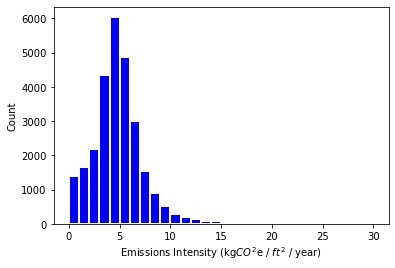

In [16]:
import matplotlib.pyplot as plt
plt.hist(emissions_intensity_2024, bins=30 , range = (0,30), linewidth=2, edgecolor="white",color = '#0000FF')
# plt.axhline(4.53, color='r') # horizontal
plt.xlabel('Emissions Intensity (kg$CO^{2}$e / $ft^{2}$ / year)')
plt.ylabel('Count')
plt.savefig('emissions.png', format='png')
plt.show()

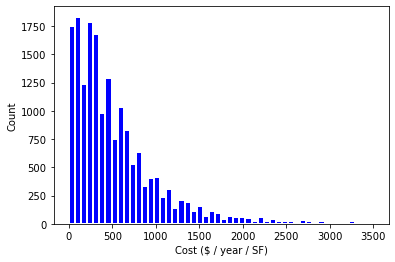

In [35]:
import matplotlib.pyplot as plt
plt.hist((emissions_intensity_2024-4)*269, bins=50 , range = (0,3500), linewidth=2, edgecolor="white",color = '#0000FF')
# plt.axhline(4.53, color='r') # horizontal
plt.xlabel('Cost ($ / year / SF)')
plt.ylabel('Count')
plt.savefig('emissions.png', format='png')
plt.show()

In [ ]:
df_footprint[['bin', 'the_geom']].head()

In [180]:
df_footprint.head()

,the_geom,bin,cnstrct_yr,lstmoddate,lststatype,doitt_id,heightroof,feat_code,groundelev,shape_area,shape_len,base_bbl,mpluto_bbl,geomsource,name
0,"{'type': 'MultiPolygon', 'coordinates': [[[[-7...",3170958,1925.0,2017-08-22T00:00:00.000,Constructed,96807,29.749853,2100.0,40.0,0.0,0.0,3.065220e+09,3.065220e+09,Photogramm,NaN
1,"{'type': 'MultiPolygon', 'coordinates': [[[[-7...",5028452,1965.0,2017-08-22T00:00:00.000,Constructed,326368,22.630000,2100.0,39.0,0.0,0.0,5.012640e+09,5.012640e+09,Photogramm,NaN
2,"{'type': 'MultiPolygon', 'coordinates': [[[[-7...",5078368,1970.0,2017-08-22T00:00:00.000,Constructed,746627,35.760000,2100.0,51.0,0.0,0.0,5.060190e+09,5.060190e+09,Photogramm,NaN
3,"{'type': 'MultiPolygon', 'coordinates': [[[[-7...",3245111,1928.0,2017-08-22T00:00:00.000,Constructed,786626,37.500000,2100.0,6.0,0.0,0.0,3.086910e+09,3.086910e+09,Photogramm,NaN
4,"{'type': 'MultiPolygon', 'coordinates': [[[[-7...",4161096,1950.0,2017-08-22T00:00:00.000,Constructed,746409,18.015113,2100.0,93.0,0.0,0.0,4.075020e+09,4.075020e+09,Photogramm,NaN


In [201]:
import ast
l= ast.literal_eval(df_footprint['the_geom'][0])['coordinates'][0]
l

[[[-73.96664570466969, 40.62599676998366],
  [-73.96684846176461, 40.625977490862574],
  [-73.96685938726297, 40.62604419372411],
  [-73.96661621040211, 40.62606731716107],
  [-73.96660638332114, 40.626007324369795],
  [-73.96664680403327, 40.626003480977275],
  [-73.96664570466969, 40.62599676998366]]]

In [202]:
line1 = {
  "paths" : l,
  "spatialReference" : {"wkid" : 4326}
}

polyline1 = Polyline(line1)
print(polyline1.is_valid())

True


In [253]:
gis = GIS()
m=gis.map('New York, NY')

In [254]:
m.zoom = 12
m.draw(polyline1)


In [255]:
m

MapView(layout=Layout(height='400px', width='100%'))

--
<!--
# https://geopandas.org/en/stable/gallery/choro_legends.html
# https://geopandas.org/en/stable/getting_started/introduction.html

# import httplib, urllib, base64

# headers = {
#     # Request headers
#     'Ocp-Apim-Subscription-Key': '{subscription key}',
# }

# params = urllib.urlencode({
# })


# import geopandas as gpd
# import matplotlib.pyplot as plt 
# from mpl_toolkits.axes_grid1 import make_axes_locatable 

# # Reading the world shapefile 
# world_data = gpd.read_file(r'D:\GeoDelta\Introduction to Geopandas_Basics\Visualizing Geographical Data\world.shp')
# world_data = world_data[['NAME', 'geometry']]

# # Calculating the area of each country 
# world_data['area'] = world_data.area

# # Removing Antarctica from GeoPandas GeoDataframe
# world_data = world_data[world_data['NAME'] != 'Antarctica']
# world_data.plot()

# # Changing the projection
# current_crs = world_data.crs   
# world_data.to_crs(epsg = 3857, inplace = True)
# world_data.plot(column = 'NAME', cmap = 'hsv')

# # Re-calculate the areas in Sq. Km.
# world_data['area'] = world_data.area/1000000

# # Adding a legend 
# world_data.plot(column = 'area' , cmap = 'hsv' , legend = True, 
#                 legend_kwds = {'label': "Area of the country (Sq. Km.)"}, figsize = (7,7))

# # Resizing the legend 
# fig, ax = plt.subplots(figsize = (10,10))
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size = "7%", pad = 0.1)
# world_data.plot(column = 'NAME' , cmap = 'hsv' , legend = None, 
#                 legend_kwds = {'label': "Area of the country (Sq. Km.)"},
#                 ax = ax, cax = cax)

# https://data.cityofnewyork.us/resource/7w4b-tj9d.json

# https://www1.nyc.gov/site/planning/data-maps/open-data/bytes-archive.page?sorts[year]=0
# https://www1.nyc.gov/site/doitt/initiatives/3d-building.page
# https://www1.nyc.gov/html/gbee/html/plan/ll84_scores.shtml

# https://benchmarking.cityofnewyork.us/#/

# https://uil.carto.com/api/v2/sql?format=csv&filename=filtered_evt&q=SELECT%20bbl,%20bin,%20address,%20zipcode,%20bldgtype,%20ess,%20year,%20gfa,%20numbldgs,%20numfloors,%20eui,%20energy,%20wui,%20ghg,%20primary_type,%20other_types_dict,%20has_datacenter,%20electricity,%20bedrooms,%20natural_gas,%20steam,%20worker_dens,%20res_units,%20diesel,%20fuel_4,%20fuel_2,%20fuel_5_6%20FROM%20table_2017_disclosure_ll84_viz_01_2019%20WHERE%20(year%20%3E=%201900%20AND%20year%20%3C=%202017)%20AND%20(gfa%20%3E=%2010000%20AND%20gfa%20%3C=%20500035)%20%20AND%20(eui%20%3E=%2050%20AND%20eui%20%3C=%20350)

!-->

In [ ]:
SF_COORDINATES = (40.62599676998366, -73.96664570466969,)
# crimedata = pd.read_csv("SFPD_Incidents_2015.csv")

# for speed purposes
MAX_RECORDS = 1000

# create empty map zoomed in on San Francisco
_map = folium.Map(location=SF_COORDINATES, zoom_start=20)

# # add a marker for every record in the filtered data, use a clustered view
# for each in crimedata[0:MAX_RECORDS].iterrows():
#     _map.simple_marker(
#         location = [each[1]["Y"],each[1]["X"]],
#         clustered_marker = True)

display(_map)